# Test Calculated Barriers

In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet("../tests/triple_barrier/integration/output/base_case_short.parquet")

In [7]:
df[['open', 'high', 'low', 'close', 'volume', 'mva-12', 'mva-24', 'entry', 'close-price','close-datetime', 'close-type', 'profit']]

,open,high,low,close,volume,mva-12,mva-24,entry,close-price,close-datetime,close-type,profit
date-time,,,,,,,,,,,,
2023-01-02 20:20:00,1.06522,1.06633,1.06522,1.06618,1830.92,1.06677,1.06679,1.0,1.06572,2023-01-02 20:20:00,stop-loss,-5.0
2023-01-02 21:10:00,1.06766,1.06783,1.06740,1.06762,1331.83,1.06703,1.06698,1.0,1.06666,2023-01-02 22:00:00,take-profit,10.0
2023-01-02 22:20:00,1.06684,1.06691,1.06565,1.06585,3403.31,1.06690,1.06708,1.0,1.06584,2023-01-02 22:20:00,take-profit,10.0
2023-01-03 02:20:00,1.06653,1.06657,1.06621,1.06624,833.47,1.06721,1.06738,1.0,1.06679,2023-01-03 03:10:00,time-barrier,-2.6
2023-01-03 12:55:00,1.05618,1.05652,1.05548,1.05557,3779.56,1.05687,1.05713,1.0,1.05518,2023-01-03 13:00:00,take-profit,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 08:10:00,1.07947,1.07959,1.07930,1.07945,1405.66,1.07962,1.07969,1.0,1.07997,2024-02-01 08:20:00,stop-loss,-5.0
2024-02-01 17:55:00,1.08691,1.08719,1.08691,1.08719,1230.63,1.08716,1.08722,1.0,1.08720,2024-02-01 18:45:00,time-barrier,-2.9
2024-02-01 22:35:00,1.08726,1.08745,1.08710,1.08721,463.68,1.08747,1.08757,1.0,1.08738,2024-02-01 23:25:00,time-barrier,-1.2


In [16]:
df["profit"] = ( df["open"] - df["close-price"])*10**4

<Axes: xlabel='date-time'>

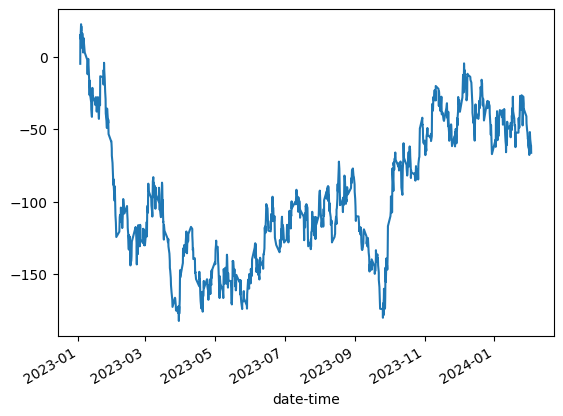

In [17]:
df["profit"].cumsum().plot()

<Axes: >

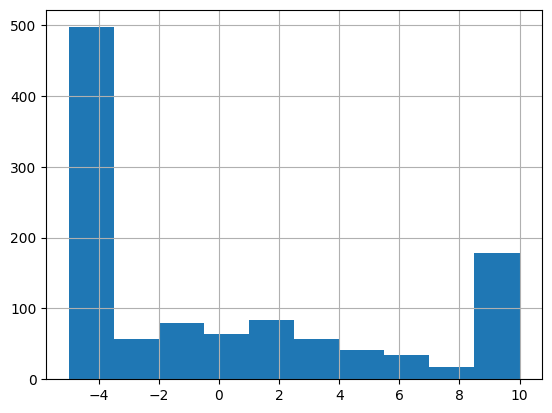

In [18]:
df["profit"].hist()

In [19]:
mask = df["profit"] > 0
print("Win trades profit", df[mask]["profit"].sum())
print("Lose trades profit", df[~mask]["profit"].sum())
print("Total profit", df["profit"].sum())

Win trades profit 2664.9999999998354
Lose trades profit -2731.399999999706
Total profit -66.39999999987097


In [20]:
df.groupby("close-type")["profit"].sum()

close-type
dynamic          -55.3
stop-loss      -2410.0
take-profit     1710.0
time-barrier     688.9
Name: profit, dtype: float64